![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo_hotel_reviews.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Tripadvisor Hotel review classifier training
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data :

<br>

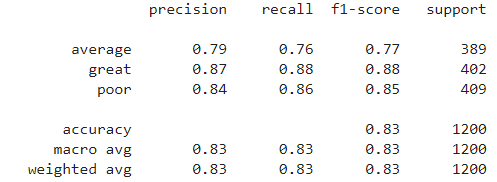


You can achieve these results or even better on this dataset with test data :

<br>


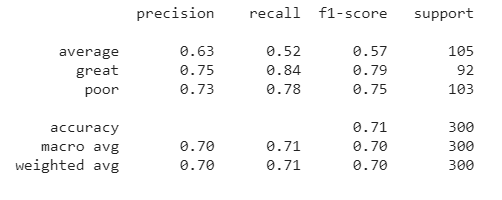

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    


import nlu

# 2. Download hotel reviews  dataset 
https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/tripadvisor_hotel_reviews_multi_lingual.csv


--2021-02-26 11:49:52--  http://ckl-it.de/wp-content/uploads/2021/02/tripadvisor_hotel_reviews_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5332717 (5.1M) [text/csv]
Saving to: ‘tripadvisor_hotel_reviews_multi_lingual.csv’

tripadvisor_hotel_r 100%[===================>]   5.08M  4.03MB/s    in 1.3s    

2021-02-26 11:49:54 (4.03 MB/s) - ‘tripadvisor_hotel_reviews_multi_lingual.csv’ saved [5332717/5332717]



In [ ]:
import pandas as pd
test_path = '/content/tripadvisor_hotel_reviews_multi_lingual.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df = train_df.iloc[:1500]
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
37,great,"exceeded expectations, stayed bavaro princess ..."
1236,average,"not bad just got week punta cana grand, like s..."
1177,poor,hotel did not let know advance pool area close...
893,great,privacy french quarter feel spent nights dauph...
917,average,"not bad, wife celebrated 10 year anniversay ba..."
...,...,...
1400,poor,disapointed hotel stayed hotel 2 days november...
1468,great,wonderful hotel 5* plus emphasis customer serv...
554,average,basic good hotel fair distance city centre clo...
353,great,"cool, staff location hotel great, reasonably p..."


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['classifier_dl'].setMaxEpochs(60)  
trainable_pipe['classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

     average       0.79      0.76      0.77       389
       great       0.87      0.88      0.88       402
        poor       0.84      0.86      0.85       409

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



,category_confidence,text,y,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,,,
37,0.999785,"exceeded expectations, stayed bavaro princess ...",great,great,"exceeded expectations, stayed bavaro princess ...","[-0.04549850523471832, 0.0030662992503494024, ..."
1236,0.928466,"not bad just got week punta cana grand, like s...",average,average,"not bad just got week punta cana grand, like s...","[-0.059047382324934006, 0.010260380804538727, ..."
1177,0.999902,hotel did not let know advance pool area close...,poor,poor,hotel did not let know advance pool area close...,"[-0.01514238677918911, 0.055598434060811996, -..."
893,0.845497,privacy french quarter feel spent nights dauph...,great,great,privacy french quarter feel spent nights dauph...,"[-0.00845617987215519, 0.01713375374674797, -0..."
917,0.786963,"not bad, wife celebrated 10 year anniversay ba...",average,average,"not bad, wife celebrated 10 year anniversay ba...","[-0.022421982139348984, 0.03690879046916962, -..."
...,...,...,...,...,...,...
1400,0.999878,disapointed hotel stayed hotel 2 days november...,poor,poor,disapointed hotel stayed hotel 2 days november...,"[-0.055554818361997604, 0.058676544576883316, ..."
1468,0.999970,wonderful hotel 5* plus emphasis customer serv...,great,great,wonderful hotel 5* plus emphasis customer serv...,"[-0.0014703000197187066, -0.002986577339470386..."
554,0.998763,basic good hotel fair distance city centre clo...,average,average,basic good hotel fair distance city centre clo...,"[-0.02877921611070633, 0.0037026735953986645, ..."


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

              precision    recall  f1-score   support

     average       0.63      0.52      0.57       105
       great       0.75      0.84      0.79        92
        poor       0.73      0.78      0.75       103

    accuracy                           0.71       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.70      0.71      0.70       300



#4.  Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("tripadvisor_hotel_reviews_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

preds

              precision    recall  f1-score   support

     average       0.48      0.42      0.45        33
       great       0.68      0.77      0.72        35
        poor       0.71      0.69      0.70        32

    accuracy                           0.63       100
   macro avg       0.62      0.63      0.62       100
weighted avg       0.62      0.63      0.62       100



,xx_embed_sentence_labse_embeddings,category_confidence,document,y,text,category
origin_index,,,,,,
0,"[-0.013124355114996433, -0.010088321752846241,...",0.989939,Tolles Hotel 5 Nächte Ende August 2005. Reserv...,great,Tolles Hotel 5 Nächte Ende August 2005. Reserv...,average
1,"[0.0211328137665987, 0.06491417437791824, -0.0...",0.685842,"தூண்டில் மற்றும் சுவிட்ச் அறை விகிதங்கள், ஏற்ற...",poor,"தூண்டில் மற்றும் சுவிட்ச் அறை விகிதங்கள், ஏற்ற...",average
2,"[-0.01487706322222948, 0.08078613132238388, -0...",0.993675,បន្ទប់ឆែកល្អចូលចិត្តសណ្ឋាគារទីតាំងល្អមិត្តភាព។...,average,បន្ទប់ឆែកល្អចូលចិត្តសណ្ឋាគារទីតាំងល្អមិត្តភាព។...,average
3,"[-0.05104789137840271, 0.0495218001306057, -0....",0.999985,beste Lage Wert Eigenschaften Waikiki Kopf Hot...,great,beste Lage Wert Eigenschaften Waikiki Kopf Hot...,great
4,"[-0.04287628084421158, 0.011480966582894325, -...",0.999809,botel not recommended little disappointed hone...,poor,botel not recommended little disappointed hone...,poor
...,...,...,...,...,...,...
95,"[-0.0008096436504274607, 0.03655293956398964, ...",0.801106,موقع رائع قضى 7 أيام في نزل القلعة في بداية ال...,great,موقع رائع قضى 7 أيام في نزل القلعة في بداية ال...,great
96,"[-0.005492127034813166, 0.055038247257471085, ...",0.987334,super emplacement les lits durs ont vraiment a...,average,super emplacement les lits durs ont vraiment a...,great
97,"[0.009459462948143482, 0.0067734019830822945, ...",0.994116,ทำเลที่ตั้งดีเยี่ยมโรงแรมที่สมบูรณ์แบบตรงกลางน...,great,ทำเลที่ตั้งดีเยี่ยมโรงแรมที่สมบูรณ์แบบตรงกลางน...,average


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("It was the best stay of my life, I loved it!! ")


,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999093,great,"It was the best stay of my life, I loved it!!","[0.025105193257331848, -0.04443410038948059, -..."


In [ ]:
fitted_pipe.predict("It was the worst stay of my life, I hated it!! ")


,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.895561,poor,"It was the worst stay of my life, I hated it!!","[0.029578806832432747, -0.042081184685230255, ..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Es war der beste Aufenthalt meines Lebens, ich habe es geliebt !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998235,great,"Es war der beste Aufenthalt meines Lebens, ich...","[0.025617875158786774, -0.05000672861933708, -..."


In [ ]:
		
# German for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Es war der schlimmste Aufenthalt meines Lebens, ich hasste es !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.467292,poor,Es war der schlimmste Aufenthalt meines Lebens...,"[0.022492459043860435, -0.05308642238378525, -..."


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("这是我一生中最美好的时光，我喜欢它！！ ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999551,great,这是我一生中最美好的时光，我喜欢它！！,"[0.011552252806723118, -0.06316247582435608, -..."


In [ ]:
# Chinese for: 'It was awful!! '
fitted_pipe.predict("太糟糕了!!")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.984005,poor,太糟糕了!!,"[-0.025874078273773193, -0.0665956661105156, -..."


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
		
#  Afrikaans for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Dit was die beste verblyf in my lewe, ek was mal daaroor !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.996766,great,"Dit was die beste verblyf in my lewe, ek was m...","[0.027523042634129524, -0.034727904945611954, ..."


In [ ]:
#  Afrikaans for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Dit was die slegste verblyf in my lewe, ek het dit gehaat !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.982654,poor,"Dit was die slegste verblyf in my lewe, ek het...","[0.020533405244350433, -0.04479401186108589, -..."


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Đó là kỳ nghỉ tuyệt vời nhất trong đời tôi, tôi yêu nó !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.800499,great,"Đó là kỳ nghỉ tuyệt vời nhất trong đời tôi, tô...","[0.022074760869145393, -0.06135038658976555, -..."


In [ ]:
# Vietnamese for: 'It was awful!! '
fitted_pipe.predict("Nó quá tệ!! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.993273,poor,Nó quá tệ!!,"[-0.011885236017405987, -0.06412354856729507, ..."


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("それは私の人生で最高の滞在でした、私はそれを愛していました!! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999605,great,それは私の人生で最高の滞在でした、私はそれを愛していました!!,"[0.03218996152281761, -0.04521138221025467, -0..."


In [ ]:
# Japanese for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("人生最悪の滞在でした、嫌いでした!! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.726080,poor,人生最悪の滞在でした、嫌いでした!!,"[0.0015585115179419518, -0.04200109466910362, ..."


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Kwakungukuhlala okuhle kakhulu empilweni yami, ngangikuthanda !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.996036,great,"Kwakungukuhlala okuhle kakhulu empilweni yami,...","[0.020903199911117554, -0.05406733229756355, -..."


In [ ]:
#  Zulu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Kwakuwukuhlala okubi kakhulu empilweni yami, ngangikuzonda !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.974802,poor,"Kwakuwukuhlala okubi kakhulu empilweni yami, n...","[0.012615667656064034, -0.05433851107954979, -..."


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:

#  Turkish for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Hayatımın en iyi kalışıydı, onu sevdim! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998495,great,"Hayatımın en iyi kalışıydı, onu sevdim!","[0.01813080720603466, -0.018600456416606903, -..."


In [ ]:
#  Turkish for: 'It was awful!! '
fitted_pipe.predict("Berbattı!!")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.993295,poor,Berbattı!!,"[0.004018284380435944, -0.057571493089199066, ..."


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
		
# Hebrew for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("זה היה השהייה הכי טובה בחיי, אהבתי את זה !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999557,great,"זה היה השהייה הכי טובה בחיי, אהבתי את זה !!","[0.021775633096694946, -0.0414351262152195, -0..."


In [ ]:
# Hebrew for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("זה היה השהייה הגרועה בחיי, שנאתי את זה !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.672065,poor,"זה היה השהייה הגרועה בחיי, שנאתי את זה !!","[0.020672744140028954, -0.04731827974319458, -..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("ఇది నా జీవితంలో ఉత్తమమైన కాలం, నేను దానిని ఇష్టపడ్డాను !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.994647,great,"ఇది నా జీవితంలో ఉత్తమమైన కాలం, నేను దానిని ఇష్...","[0.018417492508888245, -0.05317000299692154, -..."


In [ ]:
		
# Telugu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("ఇది నా జీవితంలో చెత్తగా ఉంది, నేను అసహ్యించుకున్నాను !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.971539,poor,"ఇది నా జీవితంలో చెత్తగా ఉంది, నేను అసహ్యించుకు...","[-0.000955148774664849, -0.05593333765864372, ..."


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Это был лучший отдых в моей жизни, мне очень понравилось !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999264,great,"Это был лучший отдых в моей жизни, мне очень п...","[0.024515371769666672, -0.03857886791229248, -..."


In [ ]:
#  Russian for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Это было худшее пребывание в моей жизни, я ненавидел его !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.894004,poor,"Это было худшее пребывание в моей жизни, я нен...","[-0.006281813140958548, -0.03218897059559822, ..."


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
		
# Urdu for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("یہ میری زندگی کا بہترین قیام تھا ، مجھے اس سے پیار تھا !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998025,great,یہ میری زندگی کا بہترین قیام تھا ، مجھے اس سے ...,"[0.016523482277989388, -0.04361935704946518, -..."


In [ ]:

# Urdu for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("یہ میری زندگی کا بدترین قیام تھا ، مجھے اس سے نفرت تھی !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.947351,poor,یہ میری زندگی کا بدترین قیام تھا ، مجھے اس سے ...,"[0.010332305915653706, -0.032978497445583344, ..."


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:

		
# hindi for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("यह मेरे जीवन का सबसे अच्छा प्रवास था, मुझे यह पसंद था !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998548,great,"यह मेरे जीवन का सबसे अच्छा प्रवास था, मुझे यह ...","[0.02085617184638977, -0.03468615561723709, -0..."


In [ ]:
		
# hindi for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("यह मेरे जीवन का सबसे बुरा पड़ाव था, मुझे इससे नफरत थी !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.941456,poor,"यह मेरे जीवन का सबसे बुरा पड़ाव था, मुझे इससे ...","[0.01690828427672386, -0.031606461852788925, -..."


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Бу минем тормышымның иң яхшы торышы иде, мин аны яраттым !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.995180,great,"Бу минем тормышымның иң яхшы торышы иде, мин а...","[0.0361848883330822, -0.039926111698150635, -0..."


In [ ]:
# Tartar for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Бу минем тормышымның иң начар торышы иде, мин аны нәфрәт иттем !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.973673,poor,"Бу минем тормышымның иң начар торышы иде, мин ...","[0.023216629400849342, -0.029130196198821068, ..."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("C'était le meilleur séjour de ma vie, j'ai adoré !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999693,great,"C'était le meilleur séjour de ma vie, j'ai ado...","[0.016066204756498337, -0.042281411588191986, ..."


In [ ]:
# French for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("C'était le pire séjour de ma vie, je l'ai détesté !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.625446,poor,"C'était le pire séjour de ma vie, je l'ai déte...","[0.016935674473643303, -0.04099534824490547, -..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("เป็นการพักที่ดีที่สุดในชีวิตฉันชอบมาก !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.991230,great,เป็นการพักที่ดีที่สุดในชีวิตฉันชอบมาก !!,"[-0.009586167521774769, -0.03715922310948372, ..."


In [ ]:
		
# Thai for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("เป็นการพักที่แย่ที่สุดในชีวิตฉันเกลียดมัน !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.992197,poor,เป็นการพักที่แย่ที่สุดในชีวิตฉันเกลียดมัน !!,"[-0.01785094477236271, -0.04203420504927635, -..."


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("វាជាការស្នាក់នៅដ៏ល្អបំផុតក្នុងជីវិតខ្ញុំស្រឡាញ់វាណាស់ !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.996174,great,វាជាការស្នាក់នៅដ៏ល្អបំផុតក្នុងជីវិតខ្ញុំស្រឡាញ...,"[0.0050583695992827415, -0.05372818186879158, ..."


In [ ]:
# Khmer for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("វាជាការស្នាក់នៅដ៏អាក្រក់បំផុតក្នុងជីវិតខ្ញុំស្អប់វាណាស់ !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.994846,poor,វាជាការស្នាក់នៅដ៏អាក្រក់បំផុតក្នុងជីវិតខ្ញុំស្...,"[-0.01400109101086855, -0.046681348234415054, ..."


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
		
# Yiddish for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("דאָס איז געווען דער בעסטער בלייַבן פון מיין לעבן, איך ליב געהאט עס !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998024,great,דאָס איז געווען דער בעסטער בלייַבן פון מיין לע...,"[0.016376741230487823, -0.04827779531478882, -..."


In [ ]:
# Yiddish for: 'It was awful!! '
fitted_pipe.predict("עס איז געווען שרעקלעך !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.751072,poor,עס איז געווען שרעקלעך !!,"[0.0001469508424634114, -0.057936470955610275,..."


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:

# Kygrgyz for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("Бул менин жашоомдогу эң жакшы жашоо болду, мен аны жакшы көрчүмүн !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.996750,great,"Бул менин жашоомдогу эң жакшы жашоо болду, мен...","[0.032868802547454834, -0.04612768813967705, -..."


In [ ]:
# Kygrgyz for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("Бул менин жашоомдогу эң жаман калуу болду, мен аны жек көрдүм !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.981754,poor,"Бул менин жашоомдогу эң жаман калуу болду, мен...","[0.023127004504203796, -0.04409905895590782, -..."


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'It was the best stay of my life, I loved it!!'
fitted_pipe.predict("இது என் வாழ்க்கையின் சிறந்த தங்குமிடம், நான் அதை நேசித்தேன் !! ")
		

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.994477,great,"இது என் வாழ்க்கையின் சிறந்த தங்குமிடம், நான் அ...","[0.0208477433770895, -0.049386993050575256, -0..."


In [ ]:
# Tamil for: 'It was the worst stay of my life, I hated it!!'
fitted_pipe.predict("இது என் வாழ்க்கையின் மிக மோசமான காலம், நான் அதை வெறுத்தேன் !! ")

,category_confidence,category,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.796923,poor,"இது என் வாழ்க்கையின் மிக மோசமான காலம், நான் அத...","[0.009537279605865479, -0.053919799625873566, ..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was a good experince!')
preds

,xx_embed_sentence_labse_embeddings,classifier,classifier_confidence,document
origin_index,,,,
0,"[0.059547875076532364, -0.03929056599736214, -...",great,0.999993,It was a good experince!


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')             | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                   | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                  | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)            | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                   | Info: Set the maximum allowed length f